<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/dz_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**задание 10**

Задачи:
1 Приведите краткое описание statsmodels

2 Повторите за спикером работу с statsmodels как можно более подробно.

Предоставьте
скриншоты с процессом выполнения

Процесс выполнения:
1 statsmodels - это модуль Python, который предоставляет классы и функции для оценки
множества различных статистических моделей, а также для проведения статистических
тестов и исследования статистических данных. Для каждого оценщика доступен
обширный список результатов статистики. Результаты проверяются на соответствие
существующим статистическим пакетам, чтобы убедиться, что они верны. Пакет выпущен
под лицензией Modified BSD с открытым исходным кодом (3 пункта). Электронная
документация размещена на сайте statsmodels.org

**Statsmodels**
1.1. метод наименьших квадратов

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
plt.style.use('ggplot')

In [3]:
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x,x**3))
beta = np.array([1,0.1, 10])
e = np.random.normal(size = nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.902e+08
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:01:12   Log-Likelihood:                -143.28
No. Observations:                 100   AIC:                             292.6
Df Residuals:                      97   BIC:                             300.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9517      0.270      3.520      0.0

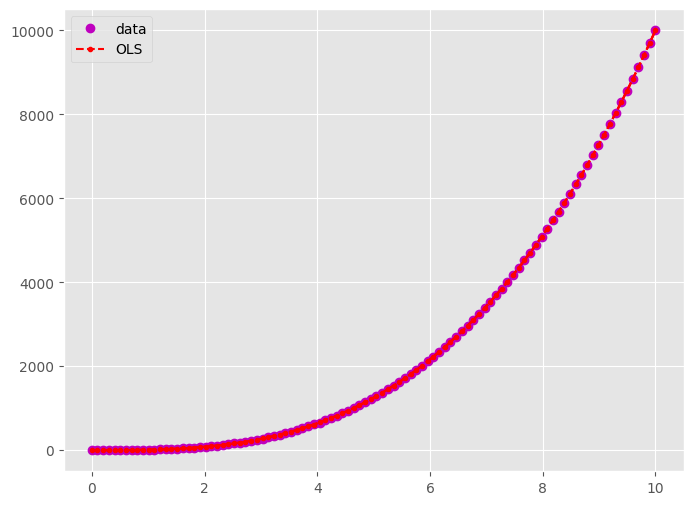

In [4]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()['obs_ci_upper']

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x,y,'o', label='data', c='m')
ax.plot(x, results.fittedvalues, 'r--.', label = 'OLS')
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

**нелинейный случай**

In [5]:
nsample = 50
sig= 0.5
x = np.linspace(0,20,nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [6]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     291.0
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           6.55e-30
Time:                        08:01:13   Log-Likelihood:                -26.317
No. Observations:                  50   AIC:                             60.63
Df Residuals:                      46   BIC:                             68.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5057      0.022     22.530      0.0

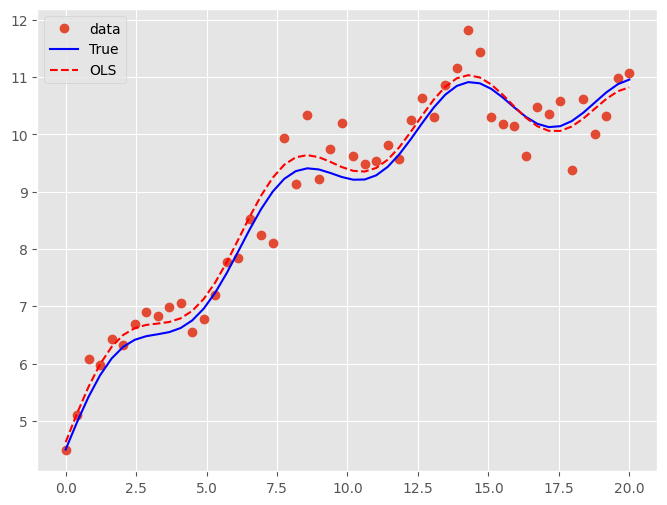

In [7]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x,y,"o", label="data")
ax.plot(x, y_true, "b-", label = "True")
ax.plot(x, res.fittedvalues, "r--", label="OLS")
#ax.plot(x, iv_u, "r--")
#ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

**фильтр Ходрика-Прескота**

In [8]:
dta = sm.datasets.macrodata.load_pandas().data
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
dta.index = index
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(dta.realgdp)
dta

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


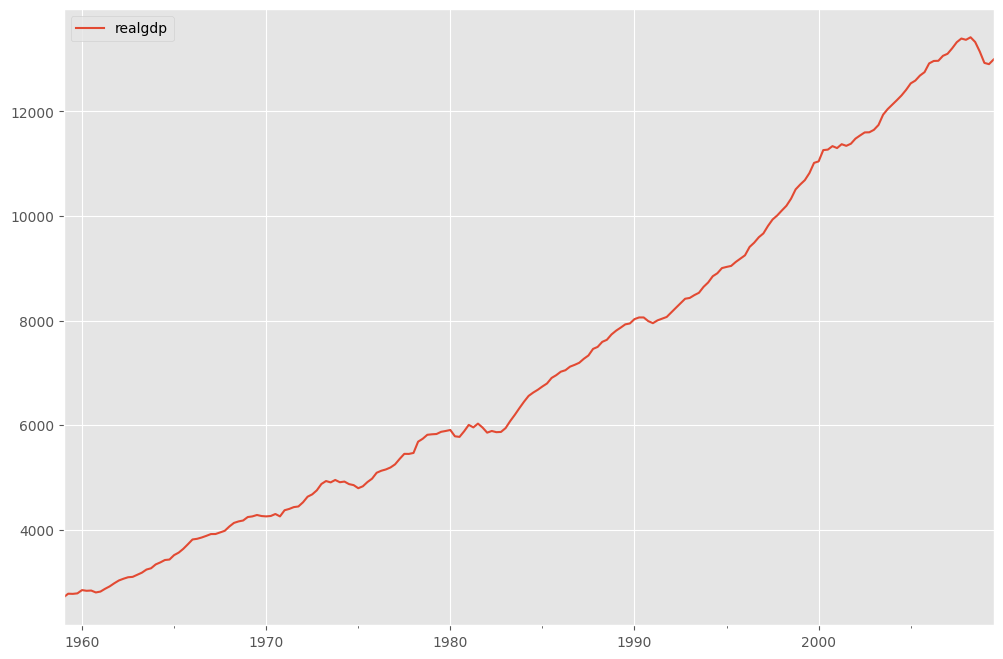

In [9]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realgdp.plot(ax=ax)
legend = ax.legend(loc="upper left")
legend.prop.set_size(20)

In [14]:
gdp_decomp = dta[["realgdp"]].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

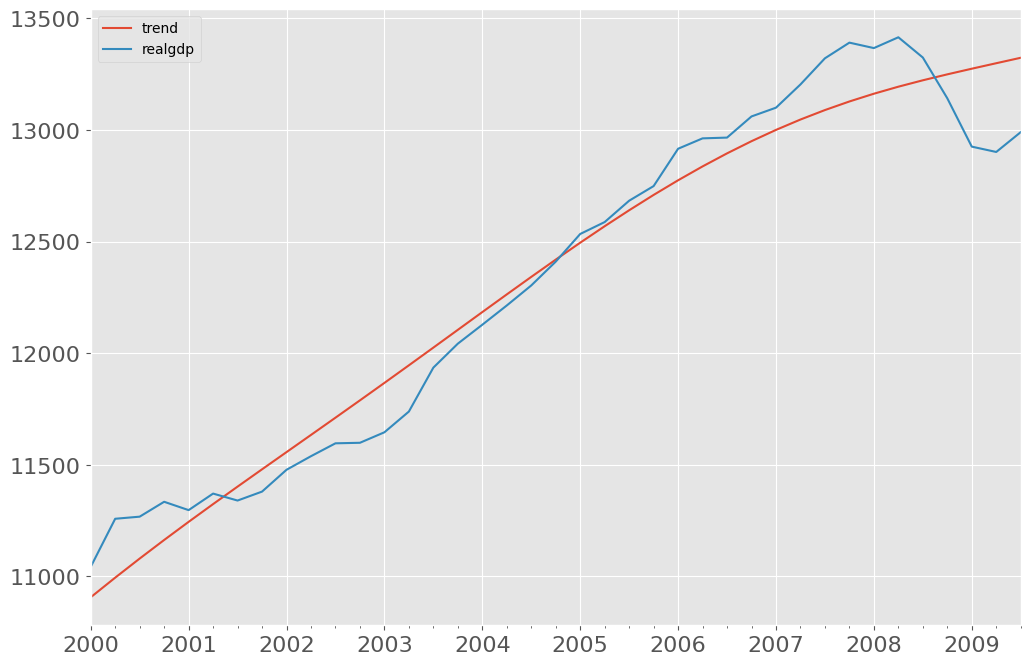

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
gdp_decomp[["trend", "realgdp"]]["2000-03-31":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

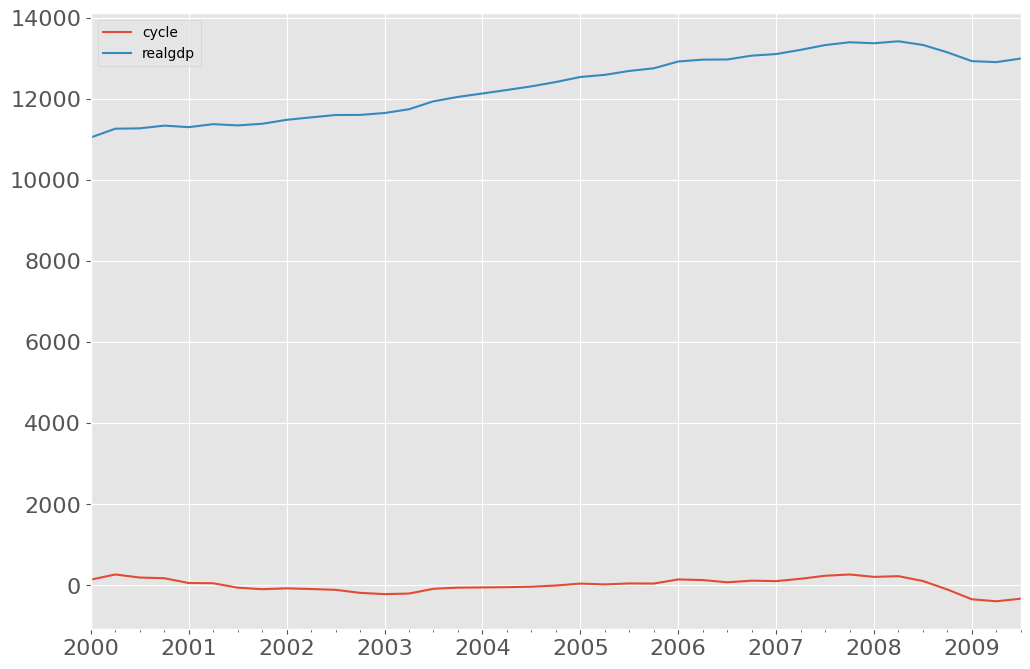

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
gdp_decomp[["cycle", "realgdp"]]["2000-03-31":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

** 11 Сатическая модель обработки текстов**

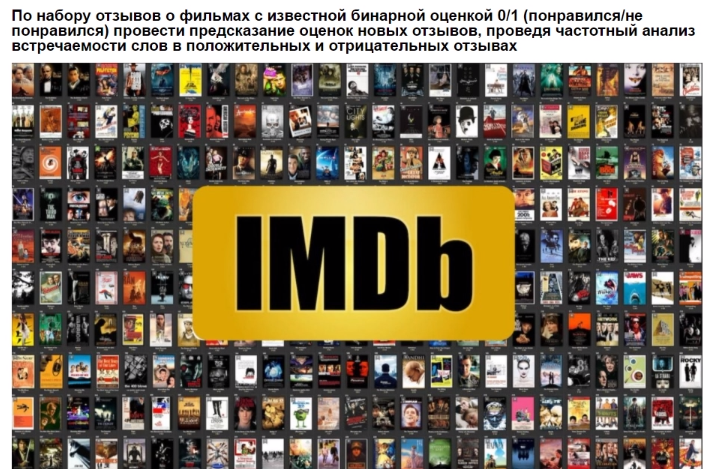

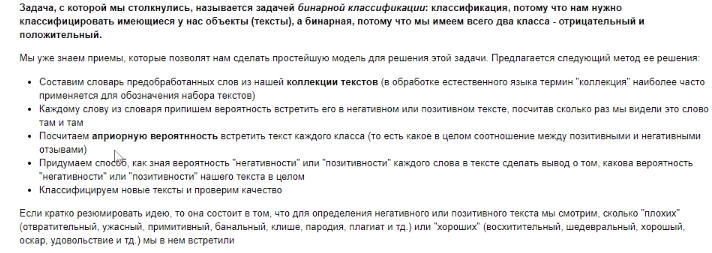